In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('SBI_Life_insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [6]:
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

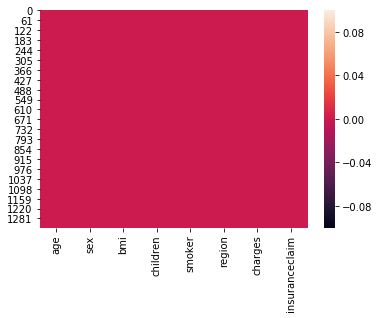

In [7]:
sns.heatmap(df.isnull())

{'whiskers': [<matplotlib.lines.Line2D at 0x28c58e17630>,
 'caps': [<matplotlib.lines.Line2D at 0x28c58e17cc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x28c58e17208>],
 'medians': [<matplotlib.lines.Line2D at 0x28c58e28390>],
 'fliers': [<matplotlib.lines.Line2D at 0x28c58e286d8>],
 'means': []}

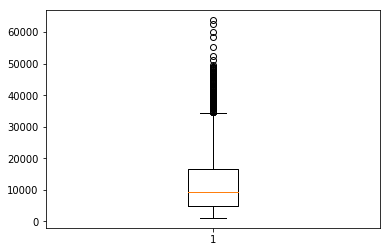

In [8]:
plt.boxplot(df["charges"])

In [9]:
z=np.abs(zscore(df))
df_new=df[(z<3).all(axis=1)]

In [10]:
df_new.shape

(1309, 8)

In [11]:
df.shape

(1338, 8)

In [12]:
x=df_new.iloc[:,:-1]
y=df_new.iloc[:,-1]

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=47)

In [14]:
model=[LogisticRegression(),GaussianNB(),DecisionTreeClassifier(),KNeighborsClassifier(),SVC()]

In [18]:
for m in model:
    m.fit(x_train,y_train)
    print(m)
    pred=m.predict(x_test)
    print("\nAccuracy Score\n",accuracy_score(y_test,pred))
    print("\nClassification Report\n",classification_report(y_test,pred))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Accuracy Score
 0.8240740740740741

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.74      0.78       177
           1       0.83      0.88      0.86       255

   micro avg       0.82      0.82      0.82       432
   macro avg       0.82      0.81      0.82       432
weighted avg       0.82      0.82      0.82       432

GaussianNB(priors=None, var_smoothing=1e-09)

Accuracy Score
 0.7870370370370371

Classification Report
               precision    recall  f1-score   support

           0       0.68      0.91      0.78       177
           1       0.92      0.70      0.80       255

   micro avg       0.79      0.79      0.79       432
   macro avg       0.80   

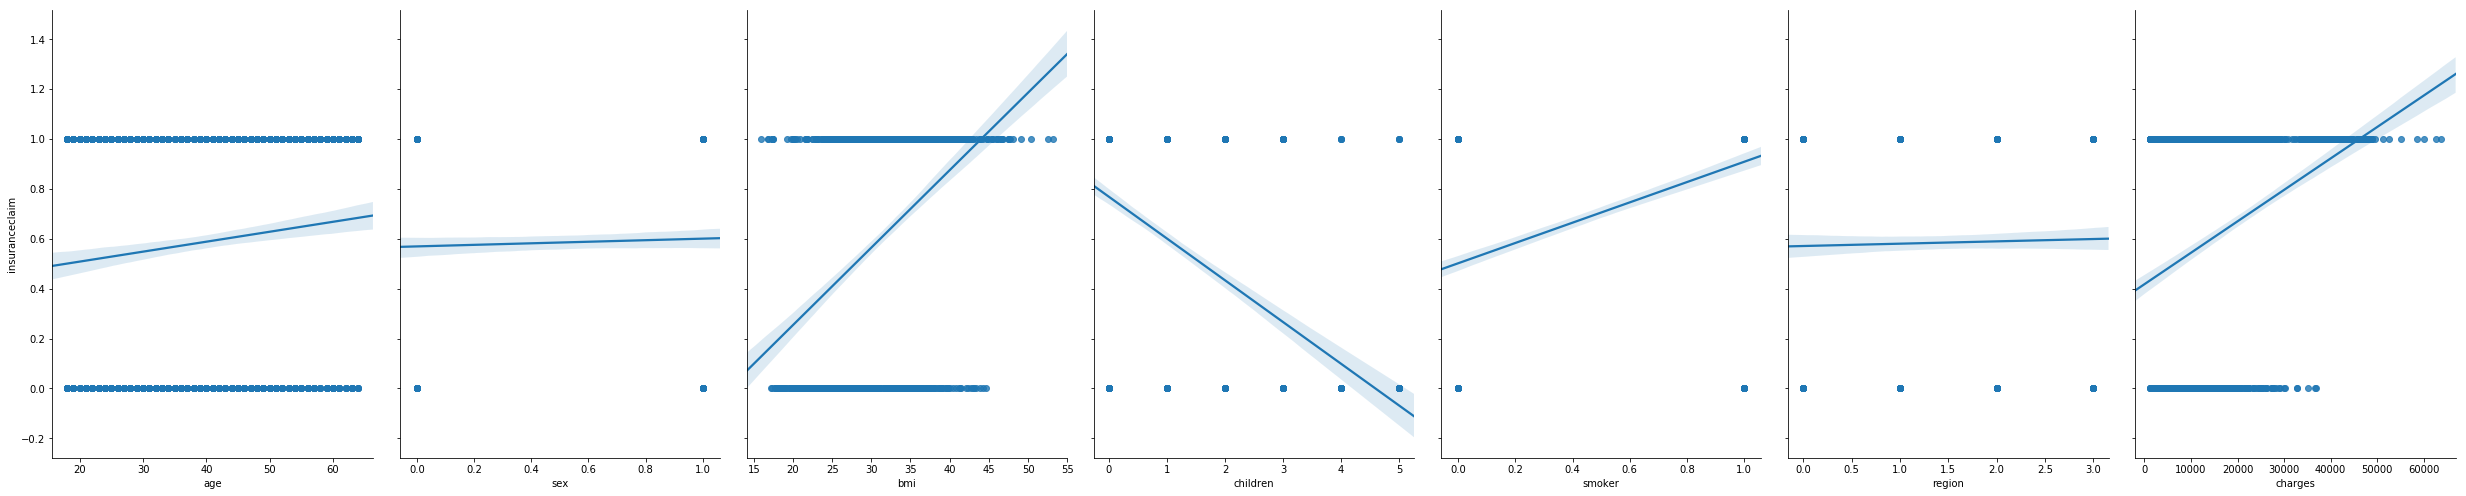

In [19]:
sns.pairplot(df,x_vars=["age","sex","bmi","children","smoker","region","charges"],y_vars="insuranceclaim",height=7,aspect=0.7,kind="reg")